# Results from Adversarial RadioML

This notebook summarizes the results from adversarial attacks against the RadioML dataset. The result logger class in `arml/performances.py` has the performances for the accuracy, AUC and perplexity. 

In [1]:
import pickle 
import matplotlib.pylab as plt
plt.style.use('bmh')

# FastGradientMethod Epsilon Variation 

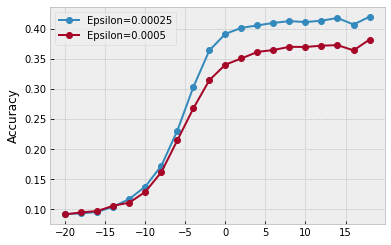

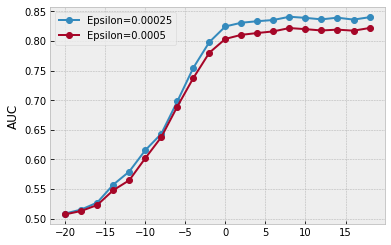

In [102]:
data = pickle.load(open('outputs/vtcnn2_FGSM_wb_5fold_op.pkl', 'rb'))
logger = data['result_logger']

plt.figure()
for i, eps in enumerate(logger.epsilons): 
    plt.plot(logger.snrs, logger.accuracy[:, i], marker='o', label=''.join(['Epsilon=', str(eps)]))
plt.legend()
plt.ylabel('Accuracy')
plt.savefig('outputs/fgsm_5fold_accuracy_epsilons.pdf')

plt.figure()
for i, eps in enumerate(logger.epsilons): 
    plt.plot(logger.snrs, logger.aucs[:, i], marker='o', label=''.join(['Epsilon=', str(eps)]))
plt.legend()
plt.ylabel('AUC')
plt.savefig('outputs/fgsm_5fold_auc_epsilons.pdf')

In [32]:
import tensorflow as tf
from tensorflow import keras 

In [71]:
tf.compat.v1.disable_eager_execution()

In [72]:
# read the saved weights from the recordings
reconstructed_model = keras.models.load_model("FGSM_CNN2_5fold.wts.h5")

In [28]:
from arml import utils

In [29]:
X, Y, snrs, mods, _ = utils.load_radioml(file_path='data/RML2016.10a_dict.pkl', shuffle=True)

In [30]:
import numpy as np

In [35]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [65]:
Y_arg = np.argmax(Y,axis = 1)

In [66]:
Y_arg.shape

(220000,)

In [73]:
predictions = reconstructed_model.predict(X)

C:\Users\wenhanzhang\Anaconda3\envs\RML_2\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [74]:
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(Y, axis=1)) / len(Y)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

Accuracy on benign test examples: 31.840000000000003%
